# 振動試験のデータ(処理済.csv)からキャンベル線図を作るプログラム

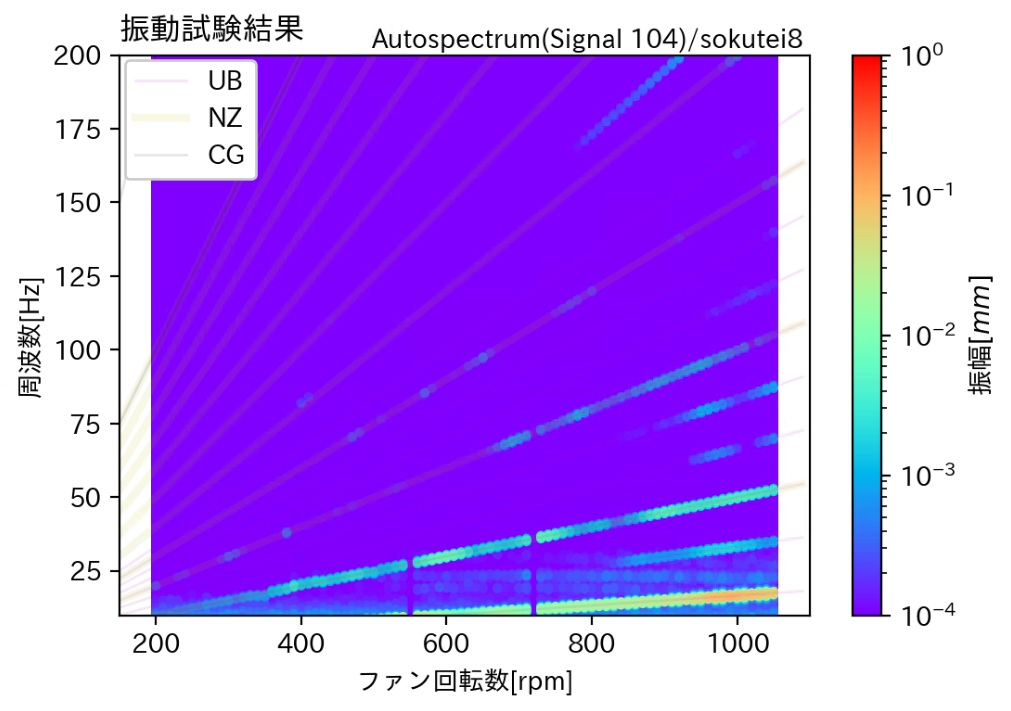

## 前準備

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib
import pandas as pd
import numpy as np
import glob
import os

In [11]:
# ファイルパスを引数として受け取って、キャンベル線図を出力する関数
# カラーバーの範囲設定が難しく、どうすればいいのか課題になっている。

def ExportCampbellChart(filepath_input, folderpath_output, save_or_show="save"):
    graph_title, filepath_output = NameDefinition(filepath_input, folderpath_output)

    df_limit = DfPreprocessing(filepath_input)
    fig = DrawGraph(df_limit, graph_title)
    
    SaveOrShow(save_or_show, filepath_output, fig)


def NameDefinition(filepath_input, folderpath_output):
    testname = os.path.dirname(filepath_input).split("/")[-1]
    sensor = os.path.basename(filepath_input).split(")")[0] + ")"
    
    graph_title = sensor + "/" + testname
    filepath_output = folderpath_output + "/" + testname + "/" + sensor + ".png"
    return graph_title, filepath_output


def DfPreprocessing(filepath_input):
    df = pd.read_csv(filepath_input, header=3)
    
    #グラフの描画を早めるための処理。不要なFFTの帯域をカットする。
    df_limit = df[df["Hz/rpm"]<=400]
    return df_limit


def DrawGraph(df_limit, graph_title):
    # グラフの生成
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(111)

    #タイトル・軸ラベルの設定
    ax.set_title("振動試験結果", loc='left')
    ax.set_xlabel("ファン回転数[rpm]")
    ax.set_ylabel("周波数[Hz]")
    ax.text(0.99, 1.05, graph_title , va='top', ha='right', transform=ax.transAxes)

    # 変域の定義
    x_range_min = 150
    x_range_max = 1100
    y_range_min = 10
    y_range_max = 400
    
    DrawGraphsNthDegree(x_range_min, x_range_max, ax)
    mappable = DrawCampbellChart(df_limit, ax)
    
    plt.xlim([x_range_min,x_range_max])
    plt.ylim([y_range_min,y_range_max])

    plt.colorbar(mappable, ax=ax, label="振幅$[mm]$")
    #plt.grid(alpha=0.1)
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.2, fancybox=True, framealpha=1)
    
    return fig

    
def DrawGraphsNthDegree(x_range_min, x_range_max, ax):
    rpm = np.arange(x_range_min, x_range_max, 10)
    
    hz = rpm/60
    ub_freq = hz
    nz_freq = hz*3
    cg_freq = hz*30

    ub_color="m"
    nz_color="y"
    cg_color="k"
    ub_linestyle = "-"
    nz_linestyle = "-"
    cg_linestyle = "-"
    ub_linewidth = 1
    nz_linewidth = 3
    cg_linewidth = 1
    ub_alpha=0.1
    nz_alpha=0.1
    cg_alpha=0.1

    ax.plot(rpm, ub_freq*1, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha, label="UB")
    ax.plot(rpm, ub_freq*2, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*3, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*4, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*5, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*6, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*7, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*8, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*9, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, ub_freq*10, color=ub_color, linestyle=ub_linestyle, linewidth=ub_linewidth, alpha=ub_alpha)
    ax.plot(rpm, nz_freq*1, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha, label="NZ")
    ax.plot(rpm, nz_freq*2, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*3, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*4, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*5, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*6, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*7, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*8, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*9, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, nz_freq*10, color=nz_color, linestyle=nz_linestyle, linewidth=nz_linewidth, alpha=nz_alpha)
    ax.plot(rpm, cg_freq*1, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha, label="CG")
    ax.plot(rpm, cg_freq*2, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*3, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*4, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*5, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*6, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*7, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*8, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*9, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)
    ax.plot(rpm, cg_freq*10, color=cg_color, linestyle=cg_linestyle, linewidth=cg_linewidth, alpha=cg_alpha)


def DrawCampbellChart(df_limit, ax):
    #空のdf_plotに描画するデータを格納していく
    df_plot = pd.DataFrame(columns=["rpm", "Hz", "power"])
    
    #GraphR用のフォーマットから描画しやすいように"rpm,Hz,power"の3列に変換
    for i in df_limit.columns:
        if(i != df_limit.columns[0]):
            x = np.full(len(df_limit),int(float(i)))
            df_x = pd.Series(x, name="rpm")
            df_y = df_limit["Hz/rpm"].rename("Hz")
            df_z = df_limit[i].rename("power")
            df_i = pd.concat([df_x, df_y, df_z], axis=1)
            df_plot = pd.concat([df_plot, df_i])
    
    #描画するときに"power"の大きなものを上に描画するように、"power"の昇順で並び替える
    df_plot = df_plot.sort_values("power")
    
    x = df_plot["rpm"]
    y = df_plot["Hz"]
    z = df_plot["power"]
    
    #描画(パラメータは試行錯誤中)
    #size=z*200
    size=30
    #size=z*10
    #size=(z-z.min())*80/(z.max()-z.min())
    mappable = ax.scatter(x, y, c=z, cmap='rainbow', s=size, marker=".", alpha=1, norm=mpl.colors.LogNorm(vmin=1e-5, vmax=1e-1))
                          #norm=mpl.colors.LogNorm(vmin=1e-2, vmax=1e-1))
                                  #, vmin=1e-8, vmax=0.0000001)
    return mappable


def SaveOrShow(save_or_show, filepath_output, fig):
    #出力モードの設定（save:画像保存、show:画像表示）
    if save_or_show=="save":
        fig.savefig(filepath_output)
        plt.clf()
        plt.close()

    elif save_or_show=="show":
        plt.show()


## A：1つのファイルからグラフを作成・見る場合

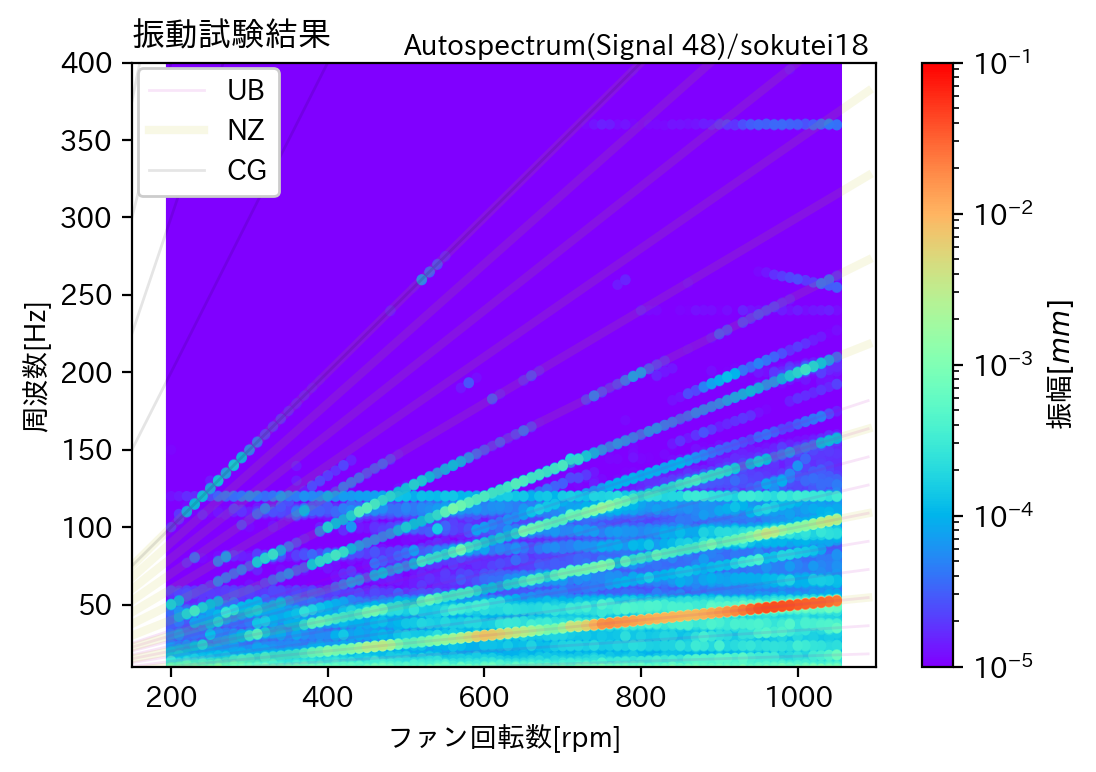

In [12]:
# 1つのCSVファイルを読み込んで図を出力する場合
# 入力部分
filepath_input = "C:/Users/ksenkou_01/Desktop/音振動試験/02_vibration/04_amplitude/sokutei18/Autospectrum(Signal 48)_amp.csv"

folderpath_output = "C:/Users/ksenkou_01/Desktop/test_graph_3"

ExportCampbellChart(filepath_input, folderpath_output, save_or_show="show")

## B：フォルダ内のファイル全てのグラフを作成する場合

In [46]:
# フォルダ内のCSVファイルをまとめて読み込んで図を出力する場合
#入力部分
folderpath_input = "C:/Users/ksenkou_01/Desktop/音振動試験/02_vibration/01_power_spectram/sokutei8"
folderpath_output = "C:/Users/ksenkou_01/Desktop/キャンベル線図"

#触らない
pathlist_input = glob.glob(folderpath_input + "/" + "*_amp.csv")
pathlist_input.sort(key=len)

for filepath_input in pathlist_input:
    ExportCampbellChart(filepath_input, folderpath_output)
